# Prediction using Unsupervised ML


## Author: Rakshita Patil

### In this task we need to predict the optimum number of clusters and represent it visually.


#### importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn import datasets
iris=datasets.load_iris()

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Standardizing data

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)

In [14]:
from sklearn.cluster import KMeans

##### To find optimum number of clusters we use ELBOW METHOD

In [15]:
wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(data)
    wcss.append(km.inertia_)

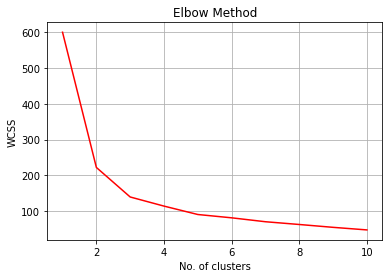

In [18]:
plt.plot(range(1,11),wcss,color="r")
plt.title("Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

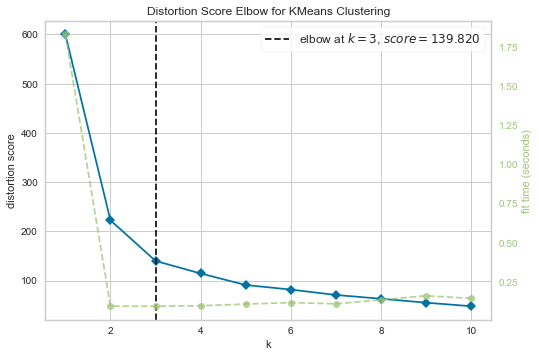

In [105]:
from yellowbrick.cluster import KElbowVisualizer as ev
elbow=ev(km,k=range(1,11))
elbow.fit(data)
elbow.poof()
plt.show()

#### The optimum number of cluster is the one where the graph bends and WCSS doesn't decrease significantly after that point. Here  optimum value of k is 3

### Building model

In [30]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=1)
label=kmeans.fit_predict(data)

In [33]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [34]:
df["Labels"]=label

In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [36]:
centroid_df=pd.DataFrame(kmeans.cluster_centers_,columns=iris.feature_names)

In [38]:
centroid_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.050220,-0.883376,0.347738,0.281527
1,-1.014579,0.853263,-1.304987,-1.254893
2,1.135970,0.088422,0.996155,1.017526


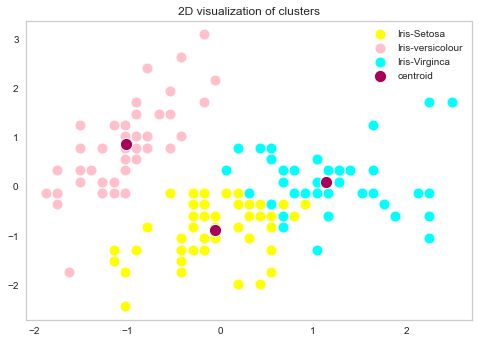

In [103]:
sns.scatterplot(data[label==0,0],data[label==0,1],s=120,color= "yellow",label="Iris-Setosa")
sns.scatterplot(data[label==1,0],data[label==1,1],s=120,color="pink",label="Iris-versicolour")
sns.scatterplot(data[label==2,0],data[label==2,1],s=120,color="cyan",label="Iris-Virginca")
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=150,label="centroid",color="m")
plt.grid(False)
plt.title("2D visualization of clusters")
plt.show()

# 3D PLOT

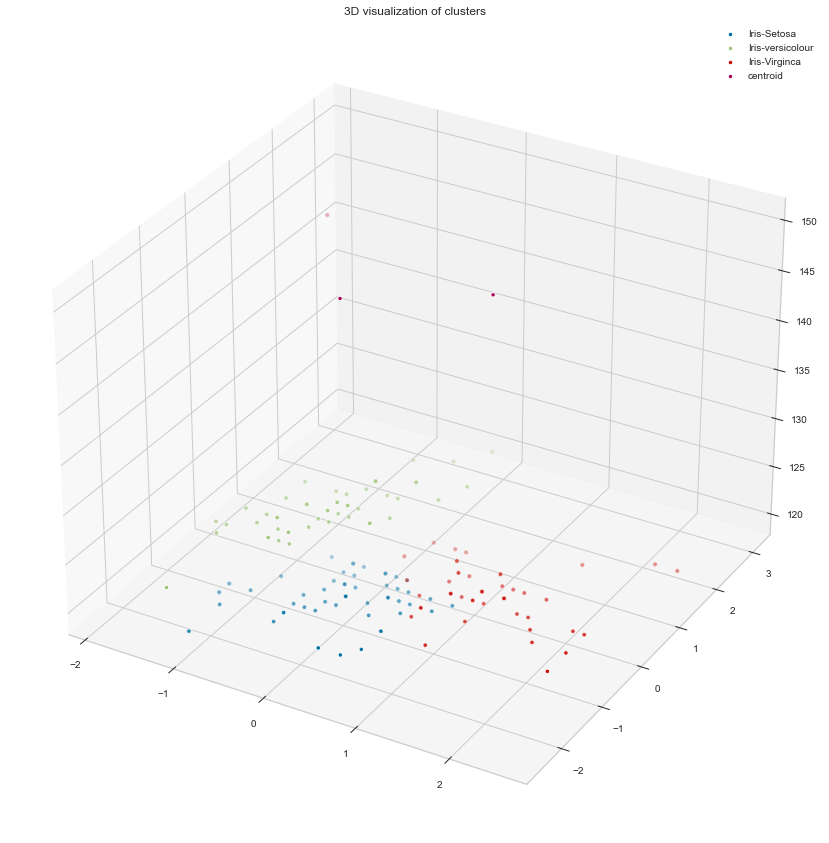

In [104]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
sns.scatterplot(data[label==0,0],data[label==0,1],s=120,color= "yellow",label="Iris-Setosa")
sns.scatterplot(data[label==1,0],data[label==1,1],s=120,color="pink",label="Iris-versicolour")
sns.scatterplot(data[label==2,0],data[label==2,1],s=120,color="cyan",label="Iris-Virginca")
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=150,label="centroid",color="m")
plt.grid(False)
plt.title("3D visualization of clusters")
plt.show()